## Baseline Model 1 

### Bag of Words (BOW) with Multinomial Naive Bayes and Stochastic Gradient Descent (SGD) Regression

BoW is the simplest form of feature extraction commonly used in Natural Language Processing and Information Retrieval.  A BoW is a representation of text that describes the occurrence of words within a document. The bag-of-words procedure falls under a broader category of techniques known as count-based representations. It provides a vocabulary of known words as well as the frequency of the known words. It is referred to as a bag because any information regarding word order or semantics will be discarded. This technique emphasizes the occurrence and frequency of words, not where they are in the document. 


After the transformation, each word in the corpus will represent a feature or column in the matrix while each review will be represented as a sample. This leads to word-document co-occurrence matrices, where the $(W, X)$ entry of the word-document matrix is set to 1 if word $W$ occurs in document $X$, and 0 otherwise. See below for an example of the transformation. For this project, the matrix created will be limited to only the top 3,000 words with the highest weights to avoid a large sparse matrix. 


For example, if the reviews are:

Review 1: ”This coffee tastes great and the package looks great.” 

Review 2: "This dress looks great." 

They will be transformed into the following vector form.

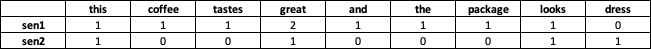


In this BOW model, the feature space will be reduced to 3000 most important tokens.

In [2]:
import pandas as pd
import numpy as np 
import pickle
from pickle import dump
from pickle import load
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from matplotlib.pyplot import figure

In [2]:
# Load the training data

train = pd.read_csv("train_data.csv")
train.head()

,overall,department,clean2
0,1.0,Snack Foods,disappointed not crispy dense no spice find go...
1,3.0,"Herbs, Spices & Seasonings",st time purchase vanilla bean not overly impre...
2,3.0,Candy & Chocolate,love version dark chocolate thought salt carme...
3,5.0,"Herbs, Spices & Seasonings",convenient
4,2.0,Beverages,taste much like peach pie not enough like tea ...


In [3]:
# Create Bag of Words(BOW) with CountVectorizer 

cv = CountVectorizer(min_df=3, max_features=3000)
data_cv = cv.fit_transform(train['clean2'])
train_bow = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
dump(cv, open('CV.pkl', 'wb'))
train_bow.head()

,ability,able,absolute,absolutely,absorb,accept,acceptable,accidentally,accord,account,...,yr,yuck,yucky,yuk,yum,yummy,zero,zest,zevia,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# check the top words being included in the matrix 
# cv.vocabulary_

In [5]:
# Define training data 

X_train = train_bow
y_train = train['overall']

## Multinomial Naive Bayes

In [27]:
# Run Multinomial Naive Bayes on the training data 

from sklearn.naive_bayes import MultinomialNB

parameters = {  
'alpha': (1, 0.1, 0.01, 0.001)  
}  

mnb = GridSearchCV(MultinomialNB(), parameters,cv=5, return_train_score=False)
mnb.fit(X_train, y_train)
print('Model best parameter is:', mnb.best_params_)
print('Model best accuracy is:', mnb.best_score_)
      
      
dump(mnb, open('CV_mnb.pkl', 'wb'))

Model best parameter is: {'alpha': 1}
Model best accuracy is: 0.496375


## Regression

In [28]:
# Run SGD regression on the training data 

from sklearn.linear_model import SGDRegressor

regr = SGDRegressor(penalty='l2')
regr.fit(X_train, y_train)
print('R2', regr.score(X_train, y_train))


dump(regr, open('CV_reg.pkl', 'wb'))

R2 0.4228117127529951


## Testing and Results

In [3]:
test = pd.read_csv("test_data.csv")
test.head()

,overall,department,clean2
0,1.0,Beverages,really excite try family love hot chocolate co...
1,2.0,Beverages,taste good omg price outrageous not purchase h...
2,5.0,Beverages,add powder mixture reusable k cup add coffee m...
3,1.0,Snack Foods,try similar product love figure love wrong hus...
4,2.0,Beverages,not expect want mocha taste husband drinking l...


In [4]:
cv = load(open('CV.pkl', 'rb'))
data_cv = cv.transform(test['clean2'])
test_bow = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
test_bow.head()

,ability,able,absolute,absolutely,absorb,accept,acceptable,accidentally,accord,account,...,yr,yuck,yucky,yuk,yum,yummy,zero,zest,zevia,zip
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Assign the testing data

X_test = test_bow
y_test = test['overall']

## MNB Results

In [7]:
# Predict with MNB model and review results 

mnb = load(open('CV_mnb.pkl', 'rb'))
y_pred_mnb = mnb.best_estimator_.predict(X_test)
mnb_results = classification_report(y_test,y_pred_mnb,digits=2)
print(mnb_results)

              precision    recall  f1-score   support

         1.0       0.56      0.59      0.58      3987
         2.0       0.39      0.37      0.38      3978
         3.0       0.42      0.40      0.41      4002
         4.0       0.46      0.42      0.44      4015
         5.0       0.60      0.71      0.65      4018

    accuracy                           0.50     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.49      0.50      0.49     20000



[[2365  985  348  154  135]
 [1010 1461  985  326  196]
 [ 473  819 1584  757  369]
 [ 222  293  644 1668 1188]
 [ 150  145  184  695 2844]]


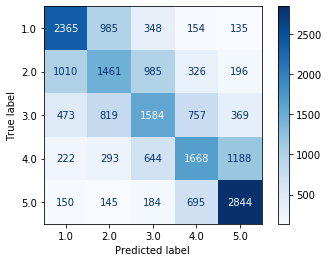

In [8]:
#plot confusion matrix 

class_names = test['overall'].unique().sort()

disp_mnb = plot_confusion_matrix(mnb, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues, values_format = '.0f'
                                )
print(disp_mnb.confusion_matrix)

In [37]:
matrix = confusion_matrix(y_test, y_pred_mnb)
print(matrix)

actual, one_less, one_more  = 0, 0, 0
for i in range(len(matrix)):
    actual += matrix[i][i]
    try:
        one_less += matrix[i+1][i]
        one_more += matrix[i][i+1]
        i+=1
    except:
        one_less += 0
        one_more += 0
# print(actual, one_less, one_more)

acc_miss1 = (actual+one_less+one_more)/np.sum(matrix)
print('The accuracy with one missed step is:', acc_miss1)

[[2365  985  348  154  135]
 [1010 1461  985  326  196]
 [ 473  819 1584  757  369]
 [ 222  293  644 1668 1188]
 [ 150  145  184  695 2844]]
The accuracy with one missed step is: 0.85025


In [57]:
# new review examples
s = ['this fish taste really good','this taste terrible', 'i do not like this','coffee' ]
a = cv.transform(s)
mnb.best_estimator_.predict(a)

array([5., 1., 2., 5.])

## Regression Results

In [12]:
regr = load(open('CV_reg.pkl', 'rb'))
y_pred_reg = regr.predict(X_test)
r2 = regr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_reg) 
mae = mean_absolute_error(y_test, y_pred_reg) 

print('R2', '%.2f'%r2)
print('MSE', '%.2f'%mse)
print('MAE', '%.2f'%mae)
print("RMSE", '%.2f'%(mse*(1/2.0)))

R2 0.37
MSE 1.26
MAE 0.92
RMSE 0.63


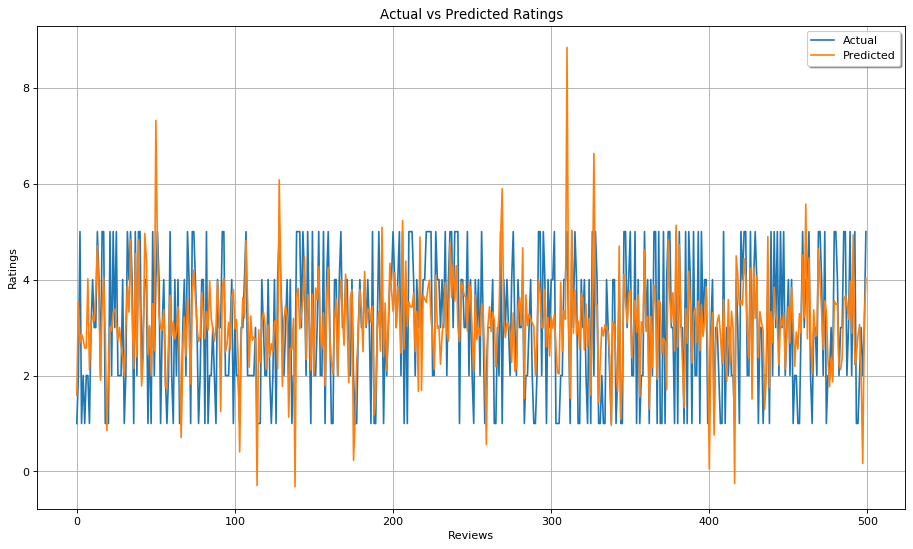

In [10]:
x_ax = range(500)
figure(figsize=(14, 8), dpi=80)
plt.plot(x_ax, y_test[:500], label="Actual")
plt.plot(x_ax, y_pred_reg[:500], label="Predicted")
plt.title("Actual vs Predicted Ratings")
plt.xlabel('Reviews')
plt.ylabel('Ratings')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [60]:
# new review examples
s = ['this fish taste really good','this taste terrible', 'i do not like this','coffee', 'love it' ]
a = cv.transform(s)
regr.predict(a)

array([3.28952014, 2.28512217, 2.78163186, 3.00682416, 3.41677872])

## Random Forest (similar results to MNB) 

In [1]:
# from sklearn.ensemble import RandomForestClassifier


# parameters ={
#     'n_estimators': [50,100,200,300],
#     'max_depth':[10, 20, 50]
# }

# rf = RandomizedSearchCV(RandomForestClassifier(bootstrap=True, criterion='entropy'), parameters,cv=5, return_train_score=False, n_iter = 5)
# rf.fit(X_train, y_train)

# dump(rf, open('CV_rf.pkl', 'wb'))

In [11]:
#load trained rf model 
rf = load(open('CV_rf.pkl', 'rb'))
y_pred_rf = rf.predict(X_test)
rf_results = classification_report(y_test,y_pred_rf,digits=4)

print(rf.best_params_, rf.best_score_, rf_results)

{'n_estimators': 100, 'max_depth': 50} 0.491575               precision    recall  f1-score   support

         1.0     0.5781    0.5967    0.5873      3987
         2.0     0.4252    0.4196    0.4224      3978
         3.0     0.4734    0.3296    0.3886      4002
         4.0     0.4628    0.4421    0.4522      4015
         5.0     0.5171    0.6872    0.5901      4018

    accuracy                         0.4951     20000
   macro avg     0.4914    0.4950    0.4881     20000
weighted avg     0.4914    0.4951    0.4882     20000



[[2379  812  241  174  381]
 [ 969 1669  595  339  406]
 [ 435  908 1319  747  593]
 [ 193  352  497 1775 1198]
 [ 139  184  134  800 2761]]


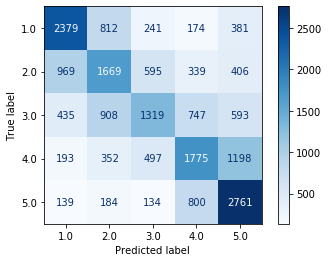

In [13]:
class_names = test['overall'].unique().sort()

disp_rf = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues, values_format = '.0f'
                                )
print(disp_rf.confusion_matrix)

## Treat it as two-class classification (ratings 1,2 are class 0, ratings 4,5 are class 1)

In [30]:
#load the data 

train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [31]:
# assign a positive sentiment to ratings greater than 3, negative sentimen to ratings less than that 

train['class'] = np.where(train['overall'] > 3,1,0)
train = train[train['overall'] != 3]


test['class'] = np.where(test['overall'] > 3,1,0)
test = test[test['overall'] != 3]

In [32]:
# create countvectorizer 

cv2 = CountVectorizer(min_df=3, max_features=3000)
data_cv2 = cv2.fit_transform(train['clean2'])
train_bow2 = pd.DataFrame(data_cv2.toarray(), columns=cv2.get_feature_names())


data_cv2_test = cv2.transform(test['clean2'])
test_bow2 = pd.DataFrame(data_cv2_test.toarray(), columns=cv.get_feature_names())

In [33]:
# Define training data 
X_train = train_bow2
y_train = train['class']

X_test = test_bow2
y_test = test['class']

In [34]:
# train mnb model 
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [35]:
# test mnb model and results 
y_pred_mnb = mnb.predict(X_test)
mnb_results = classification_report(y_test,y_pred_mnb,digits=4)
print(mnb_results)

              precision    recall  f1-score   support

           0     0.8548    0.8336    0.8441      7965
           1     0.8390    0.8596    0.8492      8033

    accuracy                         0.8467     15998
   macro avg     0.8469    0.8466    0.8466     15998
weighted avg     0.8469    0.8467    0.8466     15998

